In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import librosa
from librosa import display as dp
from scipy.io import wavfile

In [2]:
root = './recordings/'
files = os.listdir(root)

In [3]:
def get_duration(path):
    data, sr = librosa.load(path)
    dur = data.shape[0] / sr
    return dur

In [4]:
table = []
for f in tqdm(files):
    dur = get_duration(os.path.join(root, f))
    digit, speaker, ind = f.replace('.wav', '').split('_')
    table.append({'speaker': speaker, 'id': int(ind), 'digit': int(digit), 'duration': dur})

100%|██████████| 1656/1656 [00:32<00:00, 51.65it/s]


In [5]:
df = pd.DataFrame(table)
df.head()

,speaker,id,digit,duration
0,george,1,0,0.590884
1,george,10,0,0.744762
2,george,12,0,0.506259
3,george,13,0,0.543628
4,george,16,0,0.631791


<AxesSubplot: >

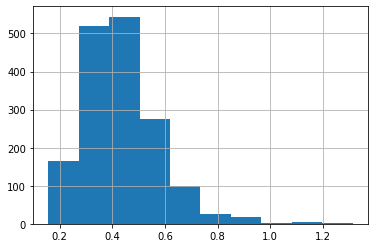

In [6]:
df.duration.hist()

In [7]:
df.describe(percentiles=[.99])

,id,digit,duration
count,1656.000000,1656.000000,1656.000000
mean,24.732488,3.766908,0.432817
std,14.388660,2.649976,0.143011
min,0.000000,0.000000,0.157415
50%,24.000000,4.000000,0.412834
99%,49.000000,9.000000,0.895170
max,49.000000,9.000000,1.313016


In [8]:
df[df.duration > 1.5]

,speaker,id,digit,duration
